C:\Users\seema\AppData\Local\Temp\ipykernel_17268\1798296200.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
C:\Users\seema\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - loss: 0.0734
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0020
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0017
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0016
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0014
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0016
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0015
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0016
Epoch 9/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0016
Epoch 10/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0014
Epoch 11/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0013
Epoch 12/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0015
Epoch 13/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0013
Epoch 14/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0010
Epoch 15/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0012
Epo

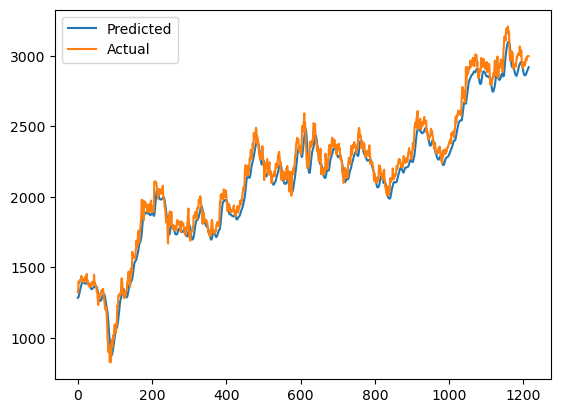

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Next day predicted value: [[2923.4958]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Next 10 days predicted values:
[[2923.49591572]
 [2917.28482883]
 [2905.86326933]
 [2891.03160379]
 [2874.07091418]
 [2855.87875395]
 [2837.07789498]
 [2818.08854125]
 [2799.17495503]
 [2780.50473458]]


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential


df = pd.read_csv(r"C:\Users\seema\OneDrive\Documents\Python Scripts\Reliance stock price .csv")


df = df.fillna(method='ffill')


x = df["Open"]
x = np.array(x).reshape((len(x), 1))  


scaler_x = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler_x.fit_transform(x)

x_stock = []
y_stock = []


for i in range(30, len(x_scaled)):
    x_stock.append(x_scaled[i-30:i])
    y_stock.append(x_scaled[i])

x_stock = np.array(x_stock)
y_stock = np.array(y_stock)


lstm = Sequential()
lstm.add(LSTM(units=50, input_shape=(x_stock.shape[1], x_stock.shape[2]), return_sequences=True))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=20, return_sequences=False))
lstm.add(Dense(units=1))  # No activation for regression

lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0), loss="mean_squared_error")


history = lstm.fit(x_stock, y_stock, batch_size=20, epochs=30)


print(history.history['loss'])


y_pred = lstm.predict(x_stock)


y_pred_inversed = scaler_x.inverse_transform(y_pred)
y_stock_inversed = scaler_x.inverse_transform(y_stock.reshape(-1, 1))


plt.plot(y_pred_inversed, label="Predicted")
plt.plot(y_stock_inversed, label="Actual")
plt.legend()
plt.show()


last_30_days = x_scaled[-30:]  # Get the last 30 days of scaled data
last_30_days = np.reshape(last_30_days, (1, 30, 1))  # Reshape for LSTM input


next_day_prediction = lstm.predict(last_30_days)
next_day_prediction_inversed = scaler_x.inverse_transform(next_day_prediction)
print(f"Next day predicted value: {next_day_prediction_inversed}")


predicted = np.array([])
for i in range(10): 
    last_30_days = x_scaled[-30:] 
    next_day = lstm.predict(np.reshape(last_30_days, (1, 30, 1)))  
    
   
    predicted = np.append(predicted, next_day)  
    
    
    x_scaled = np.append(x_scaled, next_day).reshape(-1, 1)


predicted = scaler_x.inverse_transform(np.reshape(predicted, (10, 1)))


print("Next 10 days predicted values:")
print(predicted)
